In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

/opt/conda/lib/python3.7/site-packages/fastbook/__init__.py:22: UserWarning: Missing `graphviz` - please run `conda install fastbook`
  except ModuleNotFoundError: warn("Missing `graphviz` - please run `conda install fastbook`")


In [2]:
from fastbook import * 

In [3]:
def get_dls(bs,img_size, aug_size):
    return ImageDataLoaders.from_folder(
        "data/train",
        valid_pct = 0.2,
        seed = 1991,
        item_tfms = Resize(img_size),
        bs = bs,
        batch_tfms = aug_transforms(size = aug_size),
    )

In [4]:
dls = get_dls(64, 448, 224)

In [5]:
learn = cnn_learner(dls, resnet34, loss_func = LabelSmoothingCrossEntropy(), metrics = accuracy)

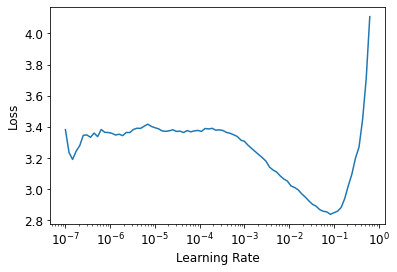

In [6]:
lr_min, lr_steep = learn.lr_find()

In [7]:
print(f"Minimum loss/10: {lr_min:.2e}, Steepest point: {lr_steep:.2e}")

Minimum loss/10: 8.32e-03, Steepest point: 3.02e-03


In [8]:
learn.fit_one_cycle(8, lr_min)

epoch,train_loss,valid_loss,accuracy,time
0,2.376102,1.352183,0.699338,00:53
1,1.724096,1.219353,0.749669,00:45
2,1.389619,0.984705,0.806623,00:45
3,1.200202,0.952109,0.798675,00:45
4,1.037017,0.785236,0.911258,00:45
5,0.933402,0.751678,0.891391,00:45
6,0.850588,0.711061,0.917881,00:45
7,0.799084,0.702086,0.921854,00:45


In [10]:
learn.save("resnet34_stage1_aug12_ls")

Path('data/train/models/resnet34_stage1_aug12_ls.pth')

In [11]:
learn.unfreeze()

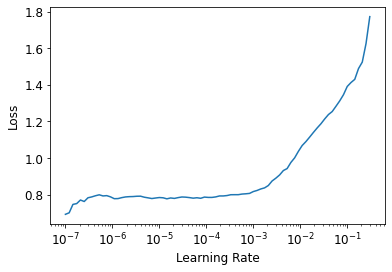

In [12]:
lr_min, lr_steep = learn.lr_find()

In [13]:
print(f"Minimum loss/10: {lr_min:.2e}, Steepest point: {lr_steep:.2e}")

Minimum loss/10: 1.45e-06, Steepest point: 9.12e-07


In [14]:
learn.fit_one_cycle(20, 5 * 1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.783185,0.699168,0.924503,00:48
1,0.774118,0.687296,0.937748,00:48
2,0.751717,0.679838,0.939073,01:00
3,0.721176,0.673133,0.943046,01:01
4,0.704510,0.649618,0.948344,00:52
5,0.684085,0.653274,0.953642,00:56
6,0.659066,0.653761,0.949669,00:55
7,0.644661,0.642923,0.957616,00:56
8,0.636589,0.629900,0.962914,00:54
9,0.616536,0.618756,0.962914,00:54


In [15]:
learn.save("resnet34_stage2_aug12_ls")

Path('data/train/models/resnet34_stage2_aug12_ls.pth')

# LogLoss

In [16]:
preds, targs = learn.get_preds()

In [25]:
num = len(targs); num

755

In [34]:
np.array([- np.log(preds[i][targs[i]]) for i in range(num)]).mean()

0.16468294

# Optimizing Values

In [46]:
import matplotlib.pyplot as plt

In [55]:
x = np.linspace(0.95, 0.99, 10)

In [57]:
def logloss(preds, targs):
    return np.array([- np.log(preds[i][targs[i]]) for i in range(num)]).mean()

In [ ]:
def modify_preds(preds, min_value, max_value):
    filt1 = preds > max_value
    filt2 = preds < min_value
    preds[filt1] = max_value
    preds[filt2] = min_value

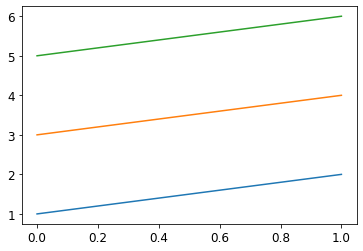

In [54]:
y = [ for v in x]

In [39]:
preds[0]

tensor([0.9249, 0.0060, 0.0088, 0.0089, 0.0036, 0.0196, 0.0119, 0.0163])

In [43]:
filt = preds > 0.8

In [44]:
preds[filt] = 0

In [45]:
preds

tensor([[0.0000, 0.0060, 0.0088,  ..., 0.0196, 0.0119, 0.0163],
        [0.0039, 0.0020, 0.0045,  ..., 0.0028, 0.0000, 0.0055],
        [0.0018, 0.0013, 0.0019,  ..., 0.0010, 0.0000, 0.0044],
        ...,
        [0.0000, 0.0050, 0.0116,  ..., 0.0179, 0.0237, 0.0314],
        [0.0028, 0.0066, 0.0116,  ..., 0.0000, 0.0045, 0.0096],
        [0.0027, 0.0040, 0.0035,  ..., 0.0035, 0.0045, 0.0038]])